In [31]:
import torch
from torch import nn 
torch.__version__

'1.11.0+cu113'

In [32]:
device = 'cuda' if torch.cuda.is_available() else "cpu" 
device

'cuda'

In [33]:
import requests
import zipfile
from pathlib import Path

In [34]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

In [35]:
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [36]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [37]:
import random
from PIL import Image
import os

In [38]:
train_paths = {}
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    for image in os.listdir(label_path):
        train_paths[os.path.join(label_path, image)] = label

test_paths = {}
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    for image in os.listdir(label_path):
        test_paths[os.path.join(label_path, image)] = label


In [39]:
train_paths.keys()

dict_keys(['data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1033251.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1044789.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1089334.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1105700.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\12301.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1285298.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\138855.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1412034.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1524655.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1572608.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1633289.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1649276.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1654444.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1660415.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1899785.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1947572.jpg', 'data\\pizza_steak_sushi\\train\\pizza\\1968947.jpg', 'data\\pizza_steak_s

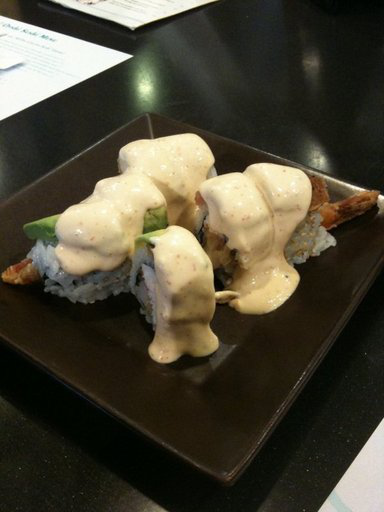

In [40]:
img_heights = []
img_widths = []
for path in train_paths.keys():
    img = Image.open(path)
    img_heights.append(img.height)
    img_widths.append(img.width)
img

In [41]:
import numpy as np

In [42]:
img_heights = np.array(img_heights)
img_widths = np.array(img_widths)

In [43]:
np.unique(img_widths) # images don't have a standardized size yet. Will need to standardize them.

array([289, 341, 382, 384, 442, 508, 511, 512])

In [44]:
#first lets store all the images in our dictionary. 

for path in train_paths.keys():
    lab = train_paths[path]
    img = Image.open(path)
    train_paths[path] = (img, lab)
    

In [45]:
for path in test_paths.keys():
    lab = test_paths[path]
    img = Image.open(path)
    test_paths[path] = (img, lab)

In [46]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [47]:
# the data transform composition is sort of like an sklearn pipeline except for pytorch data!

data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(100, 100)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

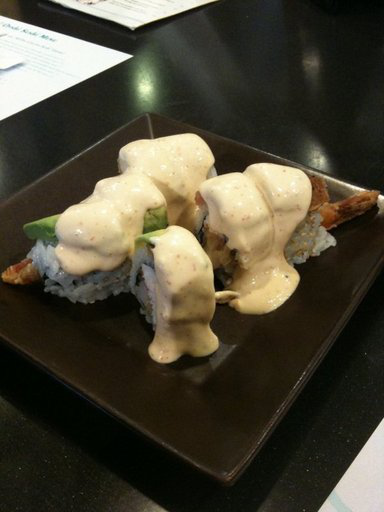

In [48]:
test_paths[path][0]

In [49]:
import matplotlib.pyplot as plt

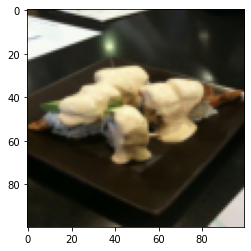

In [50]:
new_img = data_transform(test_paths[path][0])
plt.imshow(new_img.permute(1,2,0))

In [51]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

In [52]:
import torch_utils as tu

Label:  steak (1)


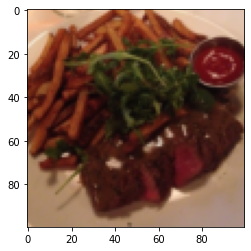

In [53]:
tu.show_example(train_data, 100)

In [65]:
train_data[0][0].device

device(type='cpu')

In [54]:
train_data.classes

['pizza', 'steak', 'sushi']

In [55]:
len(train_data), len(test_data)

(225, 75)

In [56]:
os.cpu_count()

12

In [57]:
from torch.utils.data import DataLoader

In [58]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=6, # how many CPU cores are used. You can get the available number by using "os.cpu_count()"
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=6, 
                             shuffle=False) # don't usually need to shuffle testing data